# Meteorite landings analyse
This comprehensive data set from The Meteoritical Society contains information on all of the known meteorite landings from 860 to 2013.

This dataset was downloaded from the NASA site dedicated to open data at the address: https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv("meteorite_ds.csv")

## Functions
Some useful functions for manipulating data from this dataset

In [98]:
# The raw dataframe has : 
# 45716 rows and 10 columns
shape_before = df.shape
shape_before

(45716, 10)

In [99]:
def del_count(shape):
    """ Function to calculate the amount of information deleted after each cleaning """
    rows_before = shape_before[0]
    rows_now = shape[0]
    cumul_del = rows_before - rows_now
    #print(rows_before, rows_now)
    perc_del = round((cumul_del / rows_before) * 100, 2)

    out = f"Rows initially : {rows_before} | Rows now : {rows_now} | Rows deleted : {cumul_del} - ({perc_del}%)"

    return out

In [100]:
def stats(series):
    mean = series.mean()
    std = series.std()
    cov = std / mean

    print("Mean = ", round(mean, 2))
    print("Standard deviation = ", round(std, 2))
    print("Coefficient of variation : ", round(cov, 2))

## Quick dataset exploration

In [101]:
df.shape

(45716, 10)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [103]:
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


### Column description
#### **name :**
Name of the meteorite, usually attached to the place where it was found

#### **id :** 
Meteorite ID

#### **nametype :** 
- 'valid' : Meteorites that have retained enough integrity to be clearly classified. 
- 'relict' : Objects that were once meteorites but are now highly altered by weathering on Earth

#### **recclass :** 
Classification of the meteorite (according to its chemical and mineralogical composition)

#### **mass (g) :** 
Mass in grams

#### **fall :** 
- 'fell' : for meteorites whose fall has been observed/verified. 
- 'found' : for found meteorites

#### **year :** 
Year the meteorite was first found/studied

#### **reclat :**
Latitude of the meteorite

#### **reclong :**
Longitude of the meteorite

#### **GeoLocation :**
Latitude and longitude in tuple

### A data dating back more than a millennium and... another recorded in the future
#### The oldest

In [104]:
# Minimum year
df['year'].min()

860.0

In [105]:
df.loc[df['year'] == 860.0]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
704,Nogata,16988,Valid,L6,472.0,Fell,860.0,33.725,130.75,"(33.725, 130.75)"


This meteorite is the oldest ever recorded and this thanks to the stories of the time faithfully transmitted through the generations. She had indeed fallen on May 19, 861 in Nogata in Japan in the middle of a Shinto shrine whose faithful have decided to keep

#### The most futuristic
A meteorite seems to have been recorded during the year 2101...

In [106]:
# Maximum year
df['year'].max()

2101.0

In [107]:
df.loc[df['year'] == 2101.0]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
30682,Northwest Africa 7701,57150,Valid,CK6,55.0,Found,2101.0,0.0,0.0,"(0.0, 0.0)"


This seems to be a mistake (maybe it was 2010 or 2001), but for the most superstitious, this meteorite should only weigh 55 grams. 

We also notice that the geographical coordinates of this entry do not seem to have been specified, there are certainly other entries in the dataset with this particularity, it will be necessary to decide what to do with them during the next step of data cleaning.

#### The heaviest

In [108]:
df['mass (g)'].max()

60000000.0

In [109]:
df.loc[df['mass (g)'] == 60000000]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,1920.0,-19.58333,17.91667,"(-19.58333, 17.91667)"


From its 60 tons, it is the heaviest and most imposing meteorite ever recorded, it is in Namibia in a farm called Hoba. Scientists estimate that its fall dates back more than 80,000 years, but it was first studied and classified in 1920. Despite its colossal mass, it would not have left any apparent crater, supposedly due to the atmosphere. which would have slowed it down enough, helped by its rectilinear forms.

# Data cleaning

## Delete rows with missing/imprecise data
In order to compose only with complete data we choose to delete the rows of the dataframe including missing data

### NaN data
Some data in the dataset has empty elements (NaN), we choose to delete them

In [110]:
df[df.isna().any(axis=1)]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
12,Aire-sur-la-Lys,425,Valid,Unknown,NaN,Fell,1769.0,50.66667,2.33333,"(50.66667, 2.33333)"
37,Northwest Africa 5815,50693,Valid,L5,256.800,Found,NaN,0.00000,0.00000,"(0.0, 0.0)"
38,Angers,2301,Valid,L6,NaN,Fell,1822.0,47.46667,-0.55000,"(47.46667, -0.55)"
76,Barcelona (stone),4944,Valid,OC,NaN,Fell,1704.0,41.36667,2.16667,"(41.36667, 2.16667)"
93,Belville,5009,Valid,OC,NaN,Fell,1937.0,-32.33333,-64.86667,"(-32.33333, -64.86667)"
...,...,...,...,...,...,...,...,...,...,...
45589,Yamato 984028,40648,Valid,Martian (shergottite),12.342,Found,1998.0,NaN,NaN,NaN
45660,Yambo no. 2,30346,Valid,L3,3.200,Found,1975.0,NaN,NaN,NaN
45692,Zacatecas (1969),30382,Valid,"Iron, IIIAB",6660.000,Found,1969.0,NaN,NaN,NaN
45698,Zapata County,30393,Valid,Iron,NaN,Found,1930.0,27.00000,-99.00000,"(27.0, -99.0)"


In [111]:
# Delete all rows with at least one missing data
df = df.dropna()

In [112]:
del_count(df.shape)

'Rows initially : 45716 | Rows now : 38115 | Rows deleted : 7601 - (16.63%)'

This operation caused us to lose more than 16% of the data in the dataset (which is significant) but in return we have the assurance of having complete data on which to rely.

### Quantity per year

In [113]:
# How many occurences by year ?
years_val = df['year'].value_counts()
years_val

1979.0    3045
1988.0    2295
1998.0    2147
2003.0    1754
2006.0    1616
          ... 
1583.0       1
1723.0       1
1740.0       1
1833.0       1
1792.0       1
Name: year, Length: 253, dtype: int64

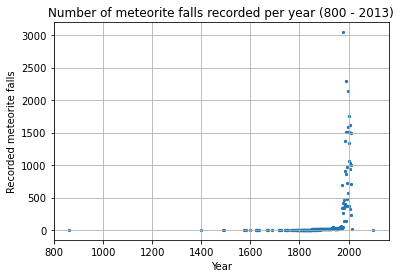

In [114]:
x = years_val.index
y = years_val.values

plt.scatter(x, y, s = 5)
plt.title('Number of meteorite falls recorded per year (800 - 2013)')
plt.xlabel('Year')
plt.ylabel('Recorded meteorite falls')
plt.grid()

The graph above reveals that almost all of the data recorded are between the years 1600 and 2000 (with a significant peak from the 80s, certainly due to the growing popularity of computers in the field of scientific research). Of course, this doesn't mean that meteorites falls were particulary numerous during this period : according to NASA, an average of 84,000 meteorites crash into the earth each year, but most of them go unnoticed (85 to 90% fall into the ocean). It's therefore possible to think that in each year of this dataset the same average quantity of meteorites crashed.

Thus, in order to take advantage of a greater density of information and to work on annual quantities of meteorites as close as possible to reality, we have chosen to deal only with data spanning from 1970 to 2013

In [115]:
# We only retain data recorded between 1970 and 2013
df = df.loc[(df['year'] >= 1970) & (df['year'] <= 2013)]

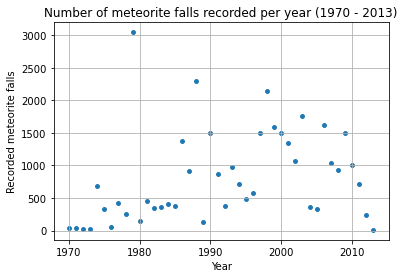

In [116]:
years_val = df['year'].value_counts()
x = years_val.index
y = years_val.values

plt.scatter(x, y, s = 15)
plt.title('Number of meteorite falls recorded per year (1970 - 2013)')
plt.xlabel('Year')
plt.ylabel('Recorded meteorite falls')
plt.grid()

In [117]:
del_count(df.shape)

'Rows initially : 45716 | Rows now : 35901 | Rows deleted : 9815 - (21.47%)'

### Mass

Text(0.5, 1.0, 'Meteorite falls recorded per mass (mg)')

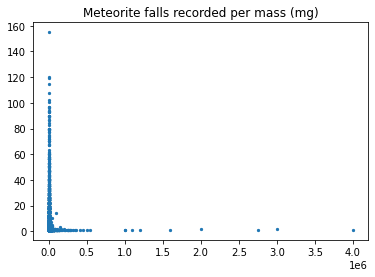

In [118]:
mass_val = df['mass (g)'].value_counts()
x = mass_val.index
y = mass_val.values

plt.scatter(x, y, s = 5)
plt.title("Meteorite falls recorded per mass (mg)")

This graph seems to show us that the vast majority of the masses identified seem to be low values.

In [119]:
df['mass (g)'].describe().round(2)

count      35901.00
mean        1483.01
std        40823.51
min            0.00
25%            6.10
50%           24.80
75%          133.10
max      4000000.00
Name: mass (g), dtype: float64

The describe() function actually shows us that 75% of meteorites have a mass of less than 133 grams. 

But it also shows us that at least one zero mass has been recorded, it would be wise to know their exact number.

In [120]:
# There are a total of 19 entries listing a meteorite at 0 grams
df[df['mass (g)'] == 0].shape[0]

19

19 meteorites were recorded with zero mass, this is not a significant number but it is similar to uninformed values, so it would be prudent to delete them, in order to distort the data as little as possible

In [121]:
# We choose to delete these rows, keeping only the rows with a weight strictly greater than 0 grams
df = df.loc[df['mass (g)'] > 0]

In [122]:
# Total rows deleted
del_count(df.shape)

'Rows initially : 45716 | Rows now : 35882 | Rows deleted : 9834 - (21.51%)'

#### A curiosity appears when you look at the low value masses

Text(0, 0.5, 'Quantity counted')

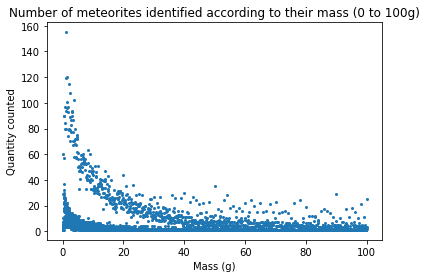

In [123]:
df_mass = df.loc[(df['mass (g)'] > 0) & (df['mass (g)'] <= 100)]
mass_val = df_mass['mass (g)'].value_counts()

x = mass_val.index
y = mass_val.values

plt.scatter(x, y, s = 4)
plt.title('Number of meteorites identified according to their mass (0 to 100g)')
plt.xlabel('Mass (g)')
plt.ylabel('Quantity counted')

If you zoom in from 0 to 100 grams, you can clearly see two converging lines appear. Some points appear to overlap on this scale (which would be illogical) but are actually shifted by a few tenths of a gram, an imperceptible difference on this scale. Zooming in more will allow us to see more clearly (next figure)

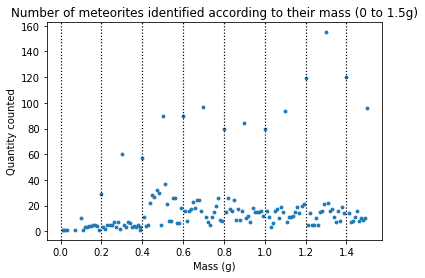

In [124]:
df_mass = df.loc[(df['mass (g)'] > 0) & (df['mass (g)'] <= 1.5)]
mass_val = df_mass['mass (g)'].value_counts()

x = mass_val.index
y = mass_val.values

plt.scatter(x, y, s = 8)
plt.title('Number of meteorites identified according to their mass (0 to 1.5g)')
plt.xlabel('Mass (g)')
plt.ylabel('Quantity counted')
plt.grid(True, axis='x', linewidth=1.2, linestyle=':', color='black')

plt.show()

The interval from 0 to 1.5 gram confirms that no point overlaps, but how to explain the existence of these 2 lines observed in the previous figure? 

We can hypothesize that some measuring devices were not sensitive enough for such low weights and that a large majority of these values were rounded off. Witness the large quantities of meteorites recorded with a weight of 0.1, 0.2, 0.3, 0.4, 0.5, ... intermediate values being rarer. The convergence of the lines can thus be explained by the increasing weight of the meteorites allowing most measuring devices to give more precise values.

### Location
Representing the longitudinal values on an x-axis and latitudinal values on a y-axis, allows us to clearly distinguish the world map

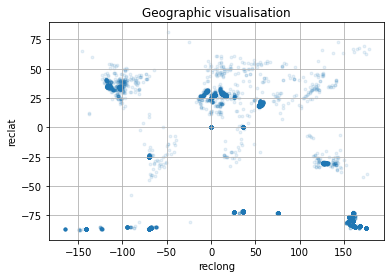

In [125]:
df.plot(kind='scatter', x='reclong', y='reclat', alpha=0.1, s=8, title='Geographic visualisation')

plt.grid(True)
plt.show()

We notice that there is a concentration of points at the coordinates (0, 0), which happens to be in the middle of the Gulf of Guinea in the Atlantic Ocean, this seems to be representations of data whose location has not been specified (equivalent to NaN). We choose to remove this data from the dataset.

In [126]:
# 6183 entries have no precise locations
df.loc[(df['reclat'] == 0.0) & (df['reclong'] == 0.0)]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
597,Mason Gully,53653,Valid,H5,24.54,Fell,2010.0,0.0,0.0,"(0.0, 0.0)"
1655,Allan Hills 09004,52119,Valid,Howardite,221.70,Found,2009.0,0.0,0.0,"(0.0, 0.0)"
1656,Allan Hills 09005,55797,Valid,L5,122.30,Found,2009.0,0.0,0.0,"(0.0, 0.0)"
1657,Allan Hills 09006,55798,Valid,H5,104.30,Found,2009.0,0.0,0.0,"(0.0, 0.0)"
1658,Allan Hills 09008,55799,Valid,H5,31.30,Found,2009.0,0.0,0.0,"(0.0, 0.0)"
...,...,...,...,...,...,...,...,...,...,...
45655,Yamato 984144,40764,Valid,H6,37.44,Found,1998.0,0.0,0.0,"(0.0, 0.0)"
45656,Yamato 984145,40765,Valid,L6,54.80,Found,1998.0,0.0,0.0,"(0.0, 0.0)"
45657,Yamato 984146,40766,Valid,H3,19.32,Found,1998.0,0.0,0.0,"(0.0, 0.0)"
45658,Yamato 984147,40767,Valid,LL6,118.90,Found,1998.0,0.0,0.0,"(0.0, 0.0)"


In [127]:
df = df.loc[(df['reclat'] != 0.0) & (df['reclong'] != 0.0)]

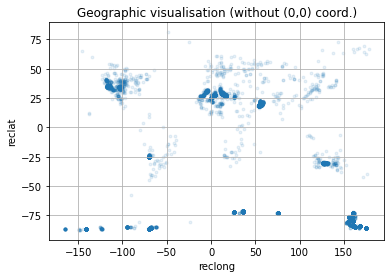

In [128]:
df.plot(kind='scatter', x='reclong', y='reclat', alpha=0.1, s=8, title='Geographic visualisation (without (0,0) coord.)')
plt.grid(True)

plt.show()

In [129]:
del_count(df.shape)

'Rows initially : 45716 | Rows now : 29476 | Rows deleted : 16240 - (35.52%)'

In [130]:
# Deleted rows broke the linearity of the index, so it needs to be reset
df = df.reset_index(drop=True)

# Visualizations
## Mass

A brief look at the describe() function tells us that the mass values have a standard deviation of more than 45000 for an average of 1719, which indicates a very heterogeneous distribution, this is partly confirmed by the fact that 75% of the 29,476 masses recensed have a value of less than 136 grams and 50% less than 25 grams. This indicates that the vast majority of meteorites identified are low masses.

In [131]:
df['mass (g)'].describe().round()

count      29476.0
mean        1719.0
std        45021.0
min            0.0
25%            6.0
50%           25.0
75%          136.0
max      4000000.0
Name: mass (g), dtype: float64

In [132]:
stats(df['mass (g)'])

Mean =  1719.22
Standard deviation =  45021.04
Coefficient of variation :  26.19


In order to gain visibility, we will group the values by mass intervals

In [133]:
mass_50 = df.loc[df['mass (g)'] <= 50]['mass (g)'].reset_index(drop=True).value_counts().sum()
mass_51_100 = df.loc[(df['mass (g)'] > 50) & (df['mass (g)'] <= 100)]['mass (g)'].reset_index(drop=True).value_counts().sum()
mass_101_500 = df.loc[(df['mass (g)'] > 100) & (df['mass (g)'] <= 500)]['mass (g)'].reset_index(drop=True).value_counts().sum()
mass_501_1k = df.loc[(df['mass (g)'] > 500) & (df['mass (g)'] <= 1000)]['mass (g)'].reset_index(drop=True).value_counts().sum()
mass_1k_10k = df.loc[(df['mass (g)'] > 1000) & (df['mass (g)'] <= 10000)]['mass (g)'].reset_index(drop=True).value_counts().sum()
mass_10k_plus = df.loc[df['mass (g)'] > 10000]['mass (g)'].reset_index(drop=True).value_counts().sum()

mass1 = pd.Series([mass_50], index=['0-50g'])
mass2 = pd.Series([mass_51_100], index=['50-100g'])
mass3 = pd.Series([mass_101_500], index=['100g-500g'])
mass4 = pd.Series([mass_501_1k], index=['500g-1kg'])
mass5 = pd.Series([mass_1k_10k], index=['1kg-10kg'])
mass6 = pd.Series([mass_10k_plus], index=['>10kg'])

mass = pd.concat([mass1, mass2, mass3, mass4, mass5, mass6])

mass

0-50g        18061
50-100g       2849
100g-500g     5158
500g-1kg      1243
1kg-10kg      1745
>10kg          420
dtype: int64

The values have been divided into 6 distinct groups, which will greatly facilitate the graphical representation

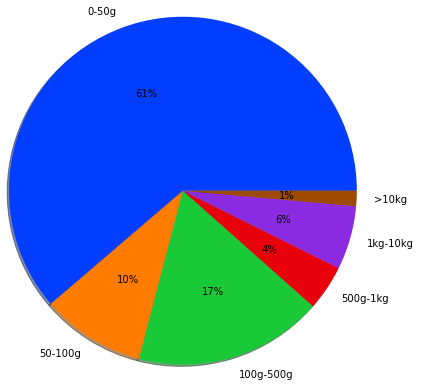

In [134]:
pal_color = sns.color_palette('bright')
plt.pie(mass.values, labels=mass.keys(), colors=pal_color, autopct='%.0f%%', radius=2, shadow=True)
#plt.title(title)
plt.show()

The graph above confirms that low-mass meteorites represent the overwhelming majority of meteorites recorded.

In [135]:
stats(mass)

Mean =  4912.67
Standard deviation =  6646.54
Coefficient of variation :  1.35


In [136]:
df.loc[df['mass (g)'] > 10000]['recclass'].value_counts()

H5                60
L6                56
L5                29
Iron, IIIAB       27
H4                27
                  ..
H/L4               1
CH/CBb             1
CO3.8              1
L4-5               1
Mesosiderite-C     1
Name: recclass, Length: 81, dtype: int64

## Classifications
Meteorites have a classification system based on their chemical and mineralogical composition. A quick look in the dataset shows that the 29476 remaining entries (after cleaning) are divided into 361 different classes

In [137]:
recclass = df['recclass'].value_counts()
recclass

L6                6165
H5                5274
H4                3176
H6                2921
L5                2607
                  ... 
EL4/5                1
Diogenite-an         1
CR1                  1
L(LL)3.5-3.7         1
Mesosiderite-C       1
Name: recclass, Length: 361, dtype: int64

In [138]:
recclass.describe()

count     361.000000
mean       81.650970
std       512.107921
min         1.000000
25%         1.000000
50%         3.000000
75%        13.000000
max      6165.000000
Name: recclass, dtype: float64

In [139]:
# Coefficient of variation
stats(recclass)

Mean =  81.65
Standard deviation =  512.11
Coefficient of variation :  6.27


Nevertheless we notice that the quantities have a significant standard deviation (512 for an average of 81). 75% of the 361 classes contain 13 or fewer entries, and 50% contain 3 or fewer. This suggests that a small number of classes contain the majority of meteorites identified.

Faced with such a number of different classes, it would be wise to reduce the number by grouping those of them with the fewest occurrences in a single class.

We decide that all classes containing less than 300 entries will be grouped into a single class called "Others"

In [140]:
limit = 300
total = recclass.sum()
recclass_high = recclass[recclass >= limit]
others_count = recclass.sum() - recclass_high.sum()

others_series = pd.Series([others_count], index=['Others'])
#recclass_high = recclass_high.append(others_series)
recclass_high = pd.concat([recclass_high, others_series])
recclass_high = recclass_high.sort_values(ascending=False)

recclass_high

L6        6165
Others    5409
H5        5274
H4        3176
H6        2921
L5        2607
LL5       1877
LL6        925
L4         749
H4/5       373
dtype: int64

In [141]:
print('---- Before the merger ----')
stats(recclass)

print('---- After the merger ----')
stats(recclass_high)

---- Before the merger ----
Mean =  81.65
Standard deviation =  512.11
Coefficient of variation :  6.27
---- After the merger ----
Mean =  2947.6
Standard deviation =  2073.39
Coefficient of variation :  0.7


Merged classes increased the mean but decreased the dispersion of values, the coefficient of variation decreased from 6.27 to 0.7

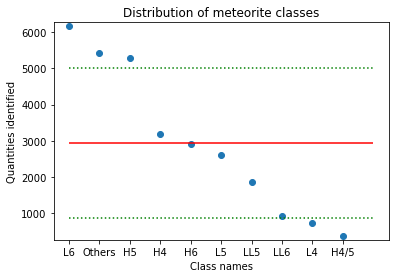

In [142]:
min_val = min(recclass_high)
max_val = max(recclass_high)
mean = recclass_high.mean()
std = recclass_high.std()
#print(mean, std)

plt.ylim(min_val - 100, max_val + 100)
plt.scatter(x=recclass_high.index, y=recclass_high.values)

# Mean line
plt.hlines(y=mean, xmin=0, xmax=len(recclass_high), colors='red')

# Std lines
plt.hlines(y=mean + std, xmin=0, xmax=len(recclass_high), linestyles='dotted', colors='green')
plt.hlines(y=mean - std, xmin=0, xmax=len(recclass_high), linestyles='dotted', colors='green')

plt.title('Distribution of meteorite classes')
plt.xlabel('Class names')
plt.ylabel('Quantities identified')

plt.show()

This graph shows us the distribution of the classes around their mean (red line) and their standard deviation (green lines). The more the value of the standard deviation is far from the mean, the more it indicates a strong dispersion of the values.

The quantities identified for each class decrease almost linearly from H4, while L6 and H5 reach high values exceeding the standard deviation, the L6 value is also so high that it exceeds the sum of all values of classes grouped in "Others"

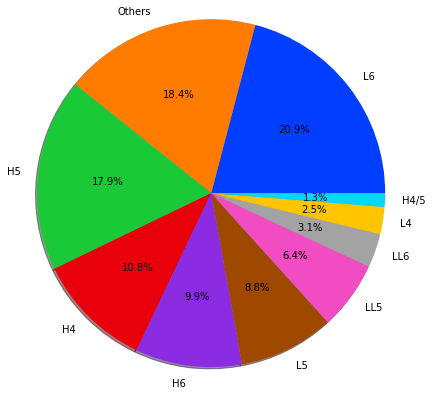

In [143]:
x = np.array(recclass_high.keys())
y = recclass_high.values

pal_color = sns.color_palette('bright')
title = 'Meteorites distribution by their classification'

plt.pie(y, labels=x, colors=pal_color, autopct='%.1f%%', radius=2, shadow=True)
#plt.title(title)
plt.show()

## Locations

The plotly module has native functions for representing geographic coordinate points on the world map. By default the graph is interactive (allowing to zoom in, zoom out, display information when the cursor passes, etc.), but for performance reasons, we have chosen to represent these graphs in the form of images.

In [144]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from IPython.display import Image # Convert bytes to image

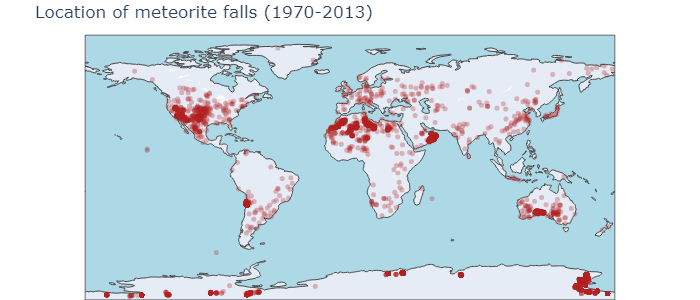

In [145]:
x_series = df['reclong']
y_series = df['reclat']

fig = px.scatter_geo(
    lon=x_series,
    lat=y_series,
    projection='equirectangular',
    opacity=0.3,
    title='Location of meteorite falls (1970-2013)',
    width=None,
    height=None
)

fig.update_layout(height=300, margin={'r':0, 't':35, 'l':0, 'b':0})
fig.update_traces(marker=dict(size=5, color='firebrick'))
fig.update_geos(
    showcountries=False, 
    showocean=True, 
    oceancolor='LightBlue'
    )

img = pio.to_image(fig, format='png', validate=True, engine='orca')
Image(img)

A brief overview of the locations of meteorite falls shows us strong concentrations in the United States (central and Californian area), North Africa, Oman as well as the extreme east of Antarctica (and to a lesser extent, southern Australia).

Conversely, in some geographical areas, no or very few meteorites have been observed, this is the case of the Amazonian forest, central Africa and central Asia.

This first observation seems to indicate that **flat and desert areas are more favorable to the discovery of meteorites**. Indeed we can hypothesize that it is much easier to detect a meteorite in the middle of the Sahara or a glacier in Antarctica than in the middle of a forest or an area with steep reliefs, moreover the high iron content of most of these meteorites have the effect of reflecting light better, contrasting with their environment, which increases their probability of detection.

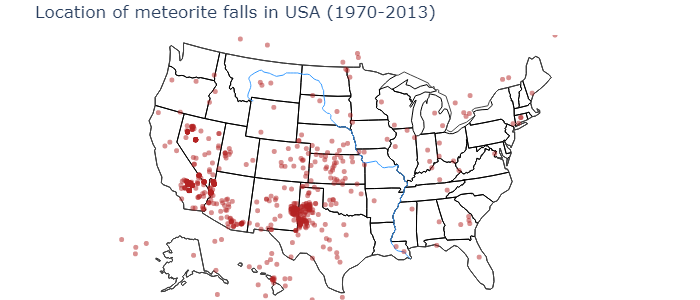

In [175]:
#new_df = df.loc[(df['recclass'] == 'L6') | (df['recclass'] == 'H5')]

fig = px.scatter_geo(
    df, 
    lon='reclong', 
    lat= 'reclat', 
    opacity=0.5,
    title='Location of meteorite falls in USA (1970-2013)'
    )

fig.update_layout(height=300, margin={'r':0, 't':35, 'l':0, 'b':0})
fig.update_traces(marker=dict(size=5, color='firebrick'))
fig.update_geos(
    showcountries=True, 
    showocean=True, 
    oceancolor='LightBlue',
    scope='usa',
    showsubunits=True,
    subunitcolor='black',
    resolution=110,
    visible=True,
    showrivers=True,
    showland=True,
    landcolor='white'
    )

img = pio.to_image(fig, format='png', validate=True, engine='orca')

Image(img)

To corroborate this on a more detailed scale in the United States, we note that the highest concentrations are found on the New Mexico/Texas border and in southeastern California in the Mojave Desert region: vast and sparsely populated geographic areas.